In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

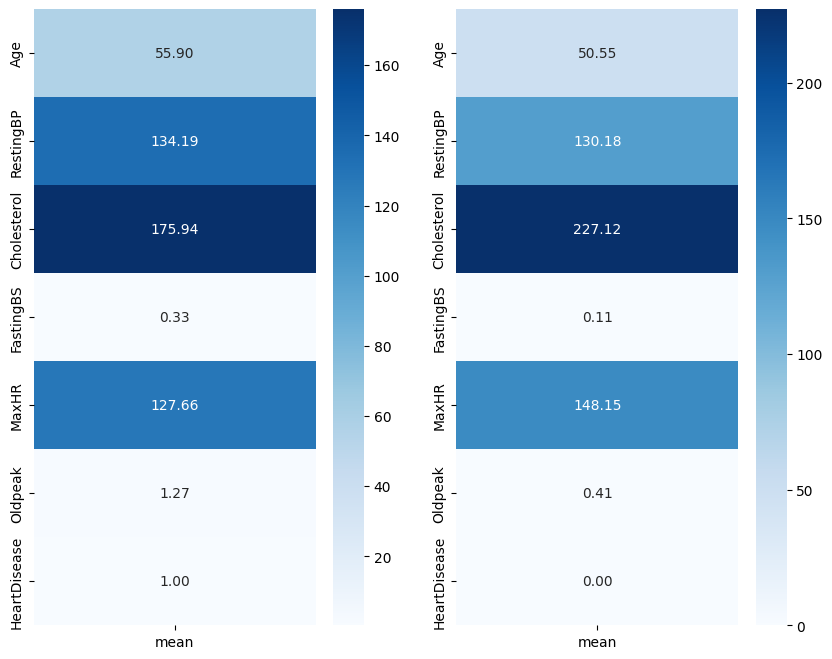

In [9]:
yes=df[df['HeartDisease']==1].describe() # so this is also a dataframe
no=df[df['HeartDisease']==0].describe()
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,8))
plt.subplot(1,2,1)
sns.heatmap(yes.loc['mean'].to_frame(),annot=True,cmap='Blues',fmt='.2f')
plt.subplot(1,2,2)
sns.heatmap(no.loc['mean'].to_frame(),annot=True,cmap='Blues',fmt='.2f')

In [10]:
cols=list(df.columns)
cate=[]
num=[]
for col in cols:
    if len(df[col].unique())>6:
        num.append(col)
    else:
        cate.append(col)

print('categorical are',*cate)
print('numerical are',*num)


categorical are Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
numerical are Age RestingBP Cholesterol MaxHR Oldpeak


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1=df.copy(deep=True)

'''for col in cate:
    df1[col]=le.fit_transform(df1[col])'''

df1['Sex']=le.fit_transform(df1['Sex'])
df1['ChestPainType']=le.fit_transform(df1['ChestPainType'])
df1['RestingECG']=le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina']=le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope']=le.fit_transform(df1['ST_Slope'])

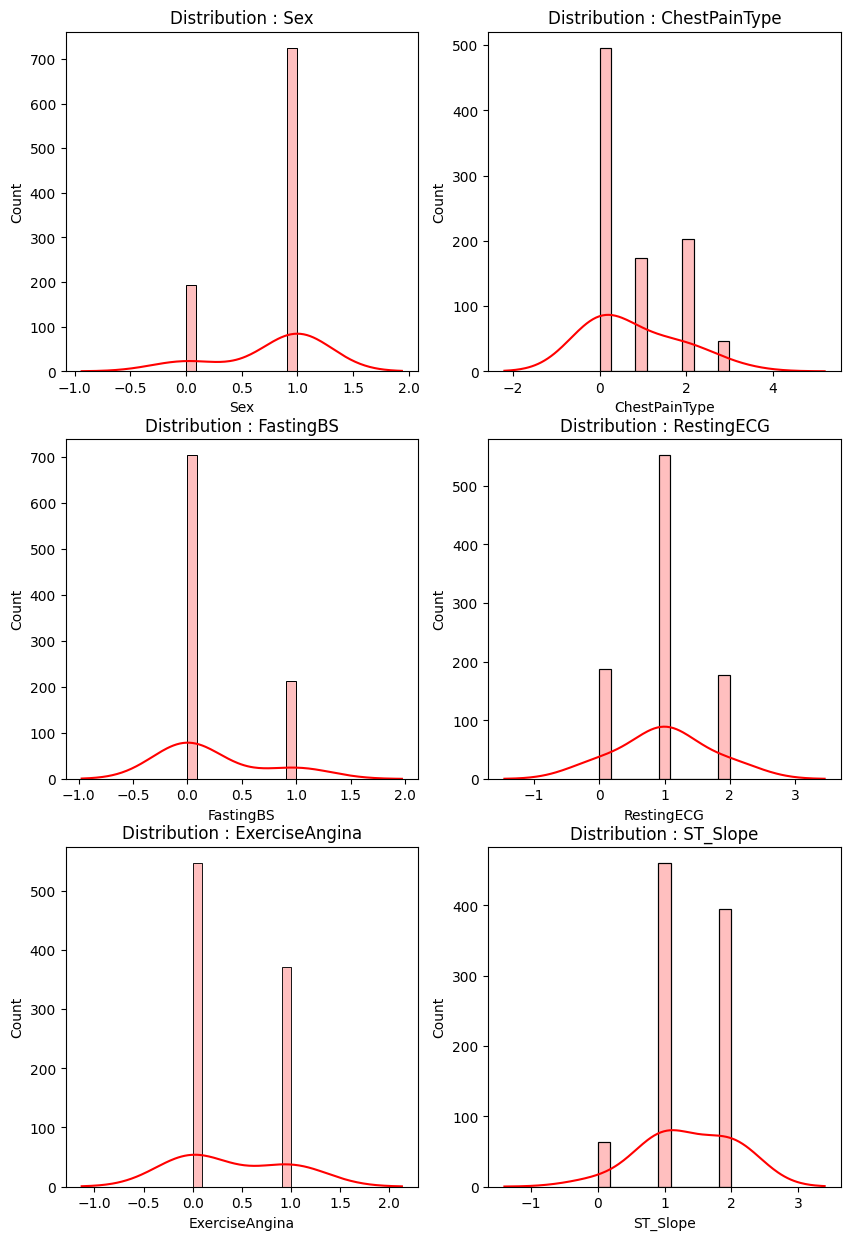

In [12]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(10,15))

for i in range(len(cate)-1):
    cur_ax=plt.subplot(3,2,i+1)
    '''sns.histplot(data=df1[cate[i]], ax=cur_ax, alpha=0.4, color='red', edgecolor='white', label='Histogram')
    sns.kdeplot(data=df1[cate[i]], ax=cur_ax, color='blue', linewidth=2, label='KDE')
    title='distribution of :' + cate[i]
    plt.title(title)'''
    plt.subplot(3,2,i+1)
    sns.histplot(data=df1[cate[i]], kde=True, kde_kws={'bw_adjust': 3.0 , 'cut' : 3}, color='red',alpha=0.25)
    title = 'Distribution : ' + cate[i]
    plt.title(title)

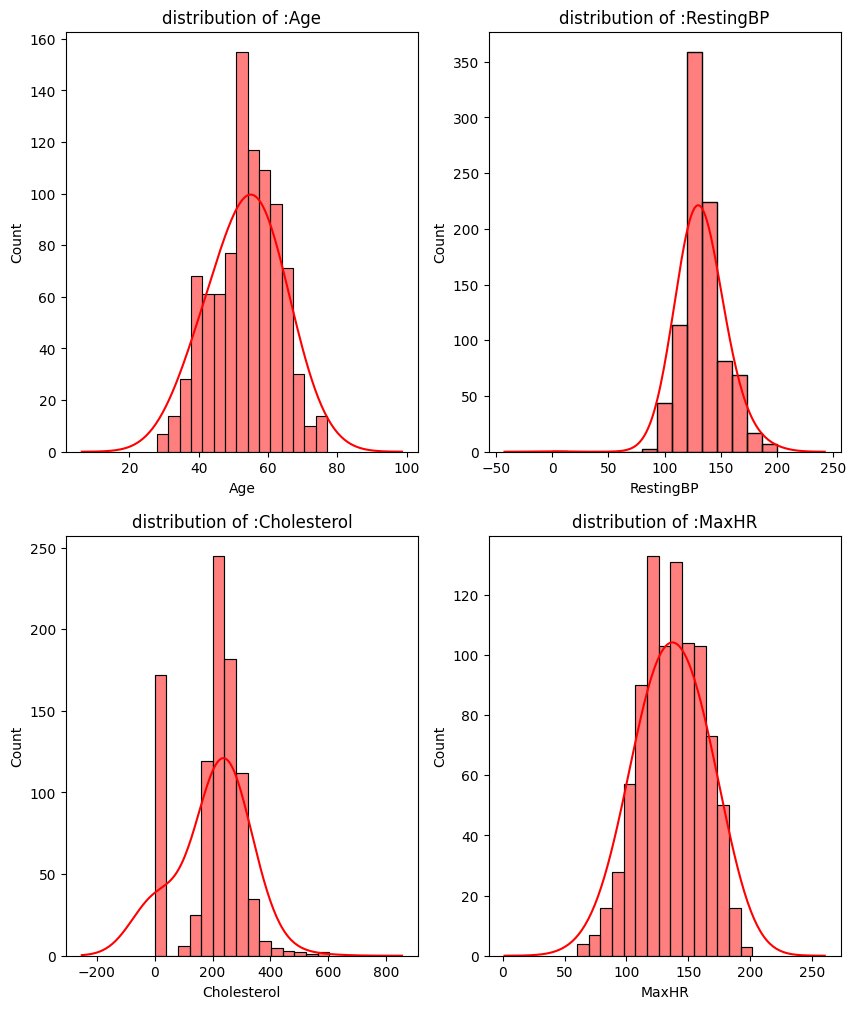

In [13]:
# so from here we are going to plot for the numerical features
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,12))
for i in range(len(num)-1):
    cur_ax=plt.subplot(2,2,i+1)
    sns.histplot(data=df1[num[i]],kde=True,kde_kws={'bw_adjust' : 3.0, 'cut' : 3},color='red',alpha=0.5,bins=15,ax=cur_ax)
    title='distribution of :' + num[i]
    plt.title(title)
plt.show()

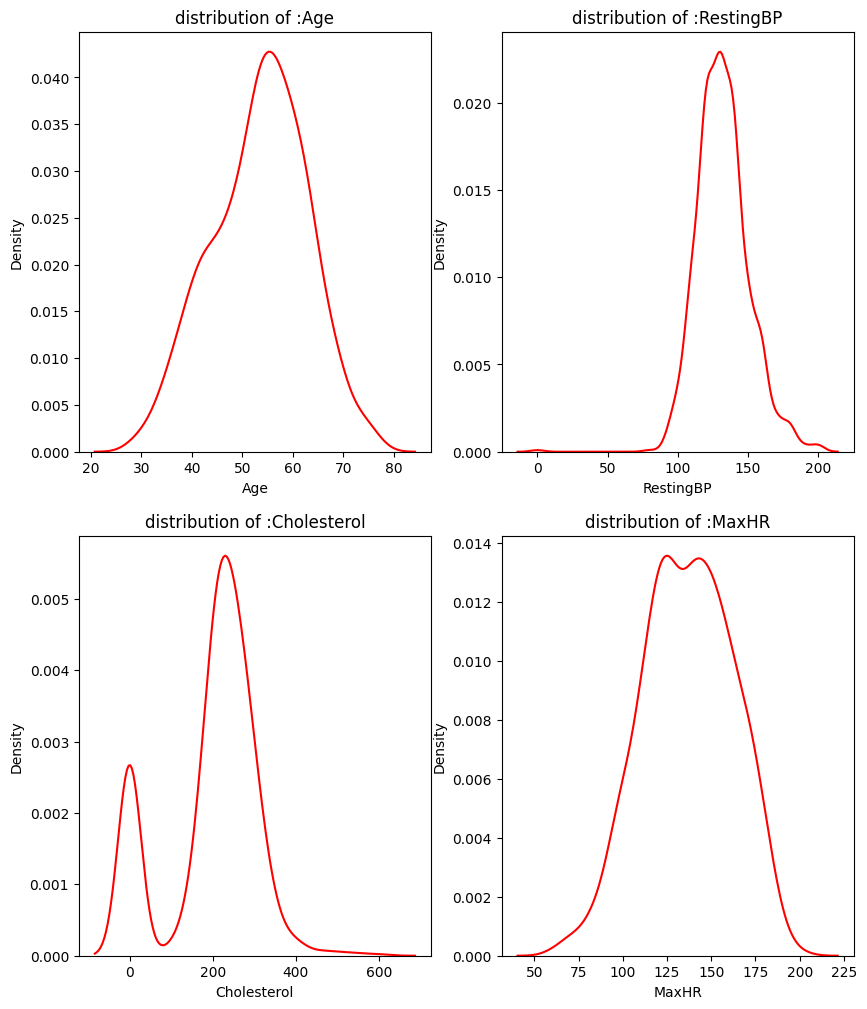

In [14]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,12))
for i in range(len(num)-1):
    cur_ax=plt.subplot(2,2,i+1)
    sns.kdeplot(data=df1[num[i]],color='red',ax=cur_ax)
    title='distribution of :' + num[i]
    plt.title(title)
plt.show()

In [15]:

# Calculate the proportions of heart disease and no heart disease
'''l = list(df['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Plot the pie chart in the first subplot
axes[0].pie(circle, labels=['No Heart Disease', 'Heart Disease'],
            autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
            colors=['blue', 'red'],  # Specify two colors for two categories
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})

axes[0].set_title('Heart Disease %')

# Plot the count plot in the second subplot
ax = sns.countplot(x='HeartDisease', data=df, palette='coolwarm', ax=axes[1], edgecolor='black')

# Add text labels above each bar
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.2, rect.get_height(), horizontalalignment='center', fontsize=11)

# Set x-axis tick labels
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
axes[1].set_title('Cases of Heart Disease')

# Display the plots
plt.show()'''


"l = list(df['HeartDisease'].value_counts())\ncircle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]\n\n# Create subplots\nfig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))\n\n# Plot the pie chart in the first subplot\naxes[0].pie(circle, labels=['No Heart Disease', 'Heart Disease'],\n            autopct='%1.1f%%', startangle=90, explode=(0.1, 0),\n            colors=['blue', 'red'],  # Specify two colors for two categories\n            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})\n\naxes[0].set_title('Heart Disease %')\n\n# Plot the count plot in the second subplot\nax = sns.countplot(x='HeartDisease', data=df, palette='coolwarm', ax=axes[1], edgecolor='black')\n\n# Add text labels above each bar\nfor rect in ax.patches:\n    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.2, rect.get_height(), horizontalalignment='center', fontsize=11)\n\n# Set x-axis tick labels\nax.set_xticklabels(['No Heart Disease', 'Heart Disease'])\naxes[1].s

In [16]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


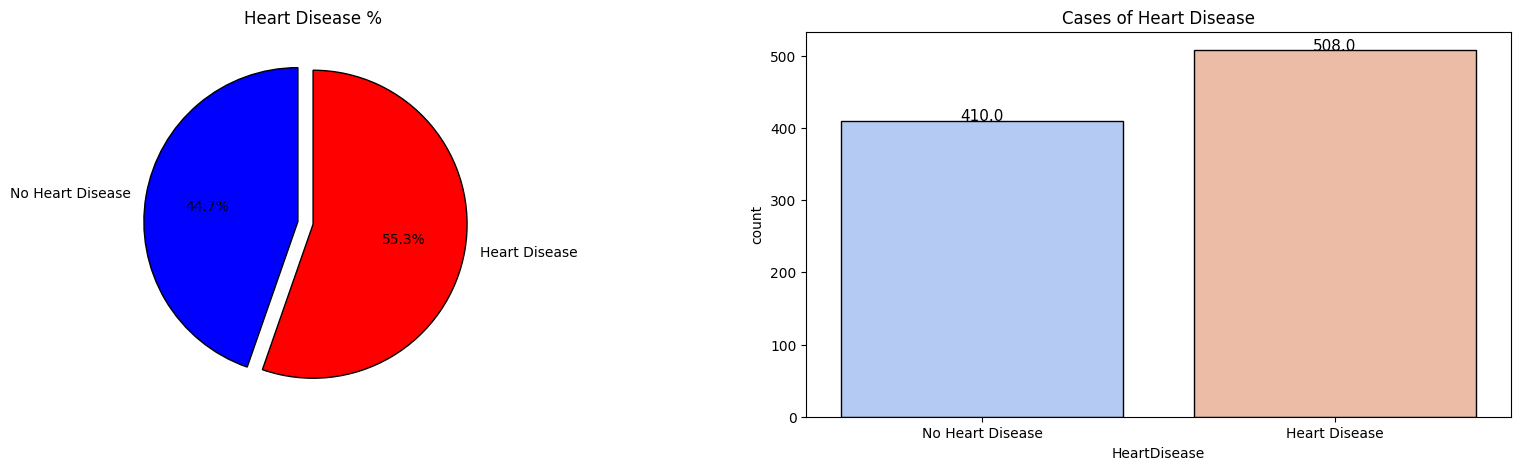

In [17]:

# Calculate the proportions of heart disease and no heart disease
l = list(df['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Plot the pie chart in the first subplot
axes[0].pie(circle, labels=['No Heart Disease', 'Heart Disease'],
            autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
            colors=['blue', 'red'],  # Specify two colors for two categories
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})

axes[0].set_title('Heart Disease %')

# Plot the count plot in the second subplot
ax = sns.countplot(x='HeartDisease', data=df, palette='coolwarm', ax=axes[1], edgecolor='black')

# Add text labels above each bar
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.2, rect.get_height(), horizontalalignment='center', fontsize=11)

# Set x-axis tick labels
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
axes[1].set_title('Cases of Heart Disease')

# Display the plots
plt.show()


this is for the categorical feature vs the target variable

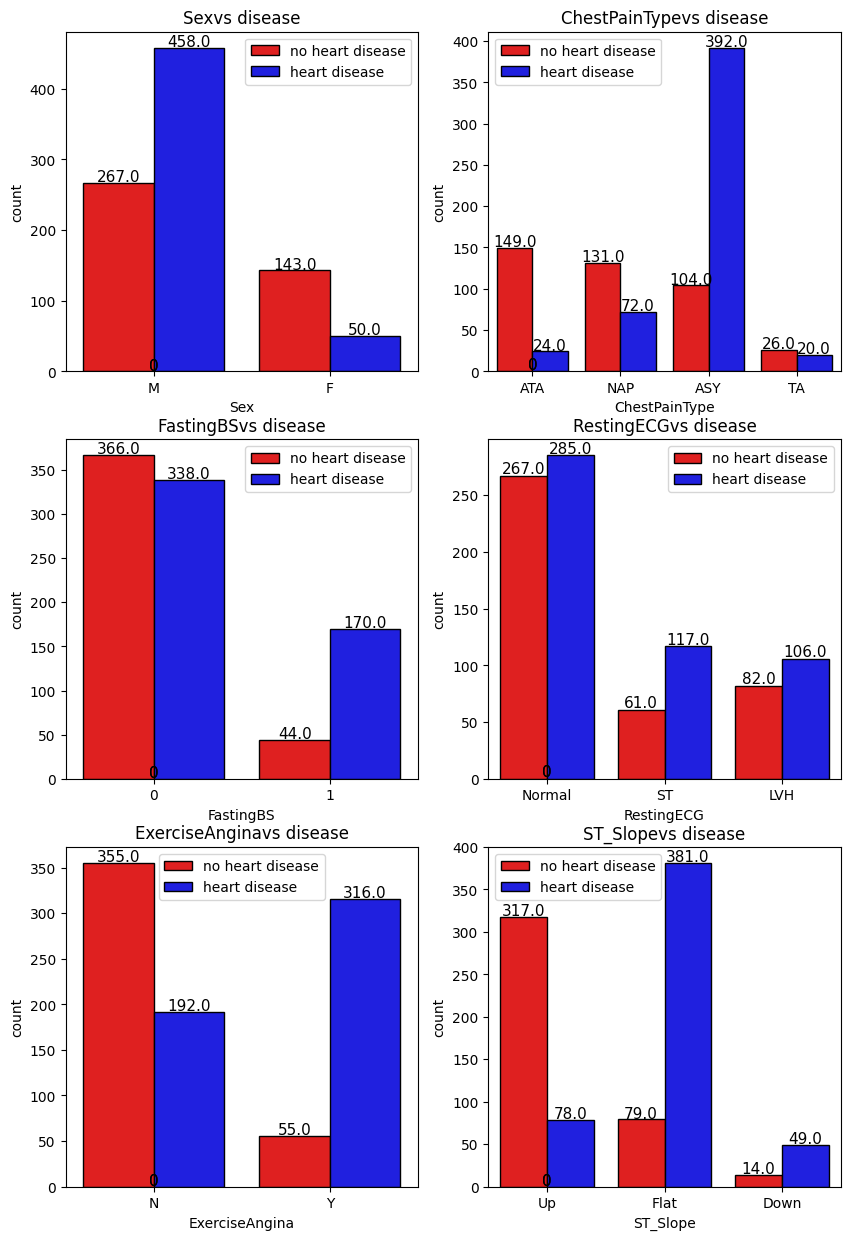

In [18]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(10,15))
for i in range(len(cate)-1):
    plt.subplot(3,2,i+1)
    ax=sns.countplot(x=cate[i],data=df,hue='HeartDisease',palette=['red','blue'],edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() /2,rect.get_height()+2,rect.get_height(),horizontalalignment='center',fontsize=11)
        title=cate[i]+' vs disease'
        plt.legend(['no heart disease','heart disease'])
        plt.title(title)


In [19]:
# all the caregorical featrues vs the positive heart disease column

cate

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

In [20]:
sex = df1[df1['HeartDisease'] == 1]['Sex'].value_counts()

# Calculating percentage for each sex
sex_cir = [(sex[0] / sum(sex) * 100), (sex[1] / sum(sex) * 100)]

In [21]:
chest=df[df1['HeartDisease']==1]['ChestPainType'].value_counts()
len(chest)
chest_cir=[chest[0] / sum(chest) *100 ,chest[1] / sum(chest) *100 , chest[2] / sum(chest) *100 , chest[3] / sum(chest) *100]

In [22]:
fas=df1[df1['HeartDisease']==1]['FastingBS'].value_counts()
len(fas)
fas_cir=[fas[0] / sum(fas) *100 , fas[1] / sum(fas) *100]

In [23]:
type(fas)

pandas.core.series.Series

In [24]:
fas.values

array([338, 170], dtype=int64)

In [25]:
rest=df1[df1['HeartDisease']==1]['RestingECG'].value_counts()
len(rest)
rest_cir=[rest[0] / sum(rest) *100 ,rest[1] / sum(rest) *100 , rest[2] / sum(rest) *100]

In [26]:
rest.values

array([285, 117, 106], dtype=int64)

In [27]:
exang=df1[df1['HeartDisease']==1]['ExerciseAngina'].value_counts()
len(exang)
exang_cir=[exang[0] / sum(exang) *100 , exang[1] / sum(exang) *100]

In [28]:
sts=df1[df1['HeartDisease']==1]['ST_Slope'].value_counts()
len(sts)
sts_cir=[sts[0] / sum(sts) *100, sts[1] / sum(sts) *100 ,sts[2] / sum(sts) *100]

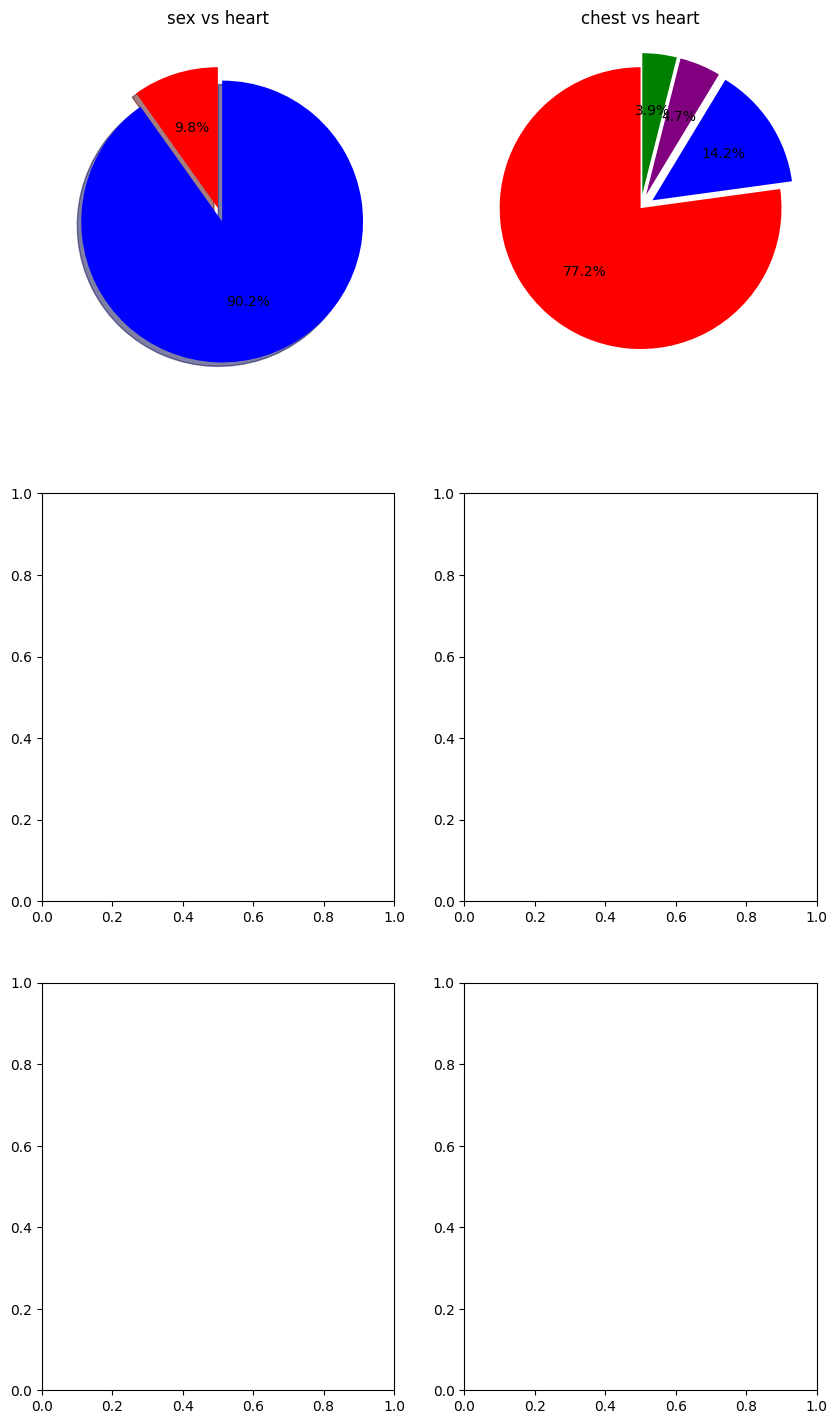

In [29]:
fig ,ax = plt.subplots(nrows=3, ncols=2 , figsize=(10,18))

ax[0,0].pie(x=sex_cir,
          colors=['red','blue'],
          autopct='%1.1f%%',
          startangle=90,
          explode=(0,0.1),
          shadow=True
)
ax[0,0].set_title('sex vs heart')

ax[0,1].pie(x=chest_cir,
            colors=['red','blue','purple','green'],
            autopct='%1.1f%%',
            startangle=90,
            explode=(0,0.1,0.1,0.1)
)
ax[0,1].set_title('chest vs heart')

plt.show()

# baaki aise hi kr lena jaise ye ho rhe hain

In [30]:
chest.index

Index(['ASY', 'NAP', 'ATA', 'TA'], dtype='object', name='ChestPainType')

In [31]:
ll=df1.groupby('ChestPainType')

In [32]:
ll

In [33]:
ll.value_counts()

ChestPainType  Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
0              31   1    120        270          0          1           153    1               1.5      1         1               1
               32   1    118        529          0          1           130    0               0.0      1         1               1
               33   0    100        246          0          1           150    1               1.0      1         1               1
               34   1    115        0            1          1           154    0               0.2      2         1               1
               35   0    138        183          0          1           182    0               1.4      2         0               1
                                                                                                                                 ..
3              67   1    145        0            0          0           125    0 

In [34]:
len(ll)

4

In [35]:
ll.count()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
ChestPainType,,,,,,,,,,,
0,496,496,496,496,496,496,496,496,496,496,496
1,173,173,173,173,173,173,173,173,173,173,173
2,203,203,203,203,203,203,203,203,203,203,203
3,46,46,46,46,46,46,46,46,46,46,46


In [36]:
ll['Age'].count()

ChestPainType
0    496
1    173
2    203
3     46
Name: Age, dtype: int64

In [37]:
ll.sum()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
ChestPainType,,,,,,,,,,,
0,27260,426,66082,92576,141,504,63725,297,576.7,582,392
1,8519,113,22598,40317,19,177,25986,17,53.2,308,24
2,10822,150,26585,40080,41,189,29077,51,137.0,298,72
3,2522,36,6275,9525,13,38,6803,6,47.7,62,20


In [38]:
cc=df1.groupby('ChestPainType').size()

In [39]:
cc

ChestPainType
0    496
1    173
2    203
3     46
dtype: int64

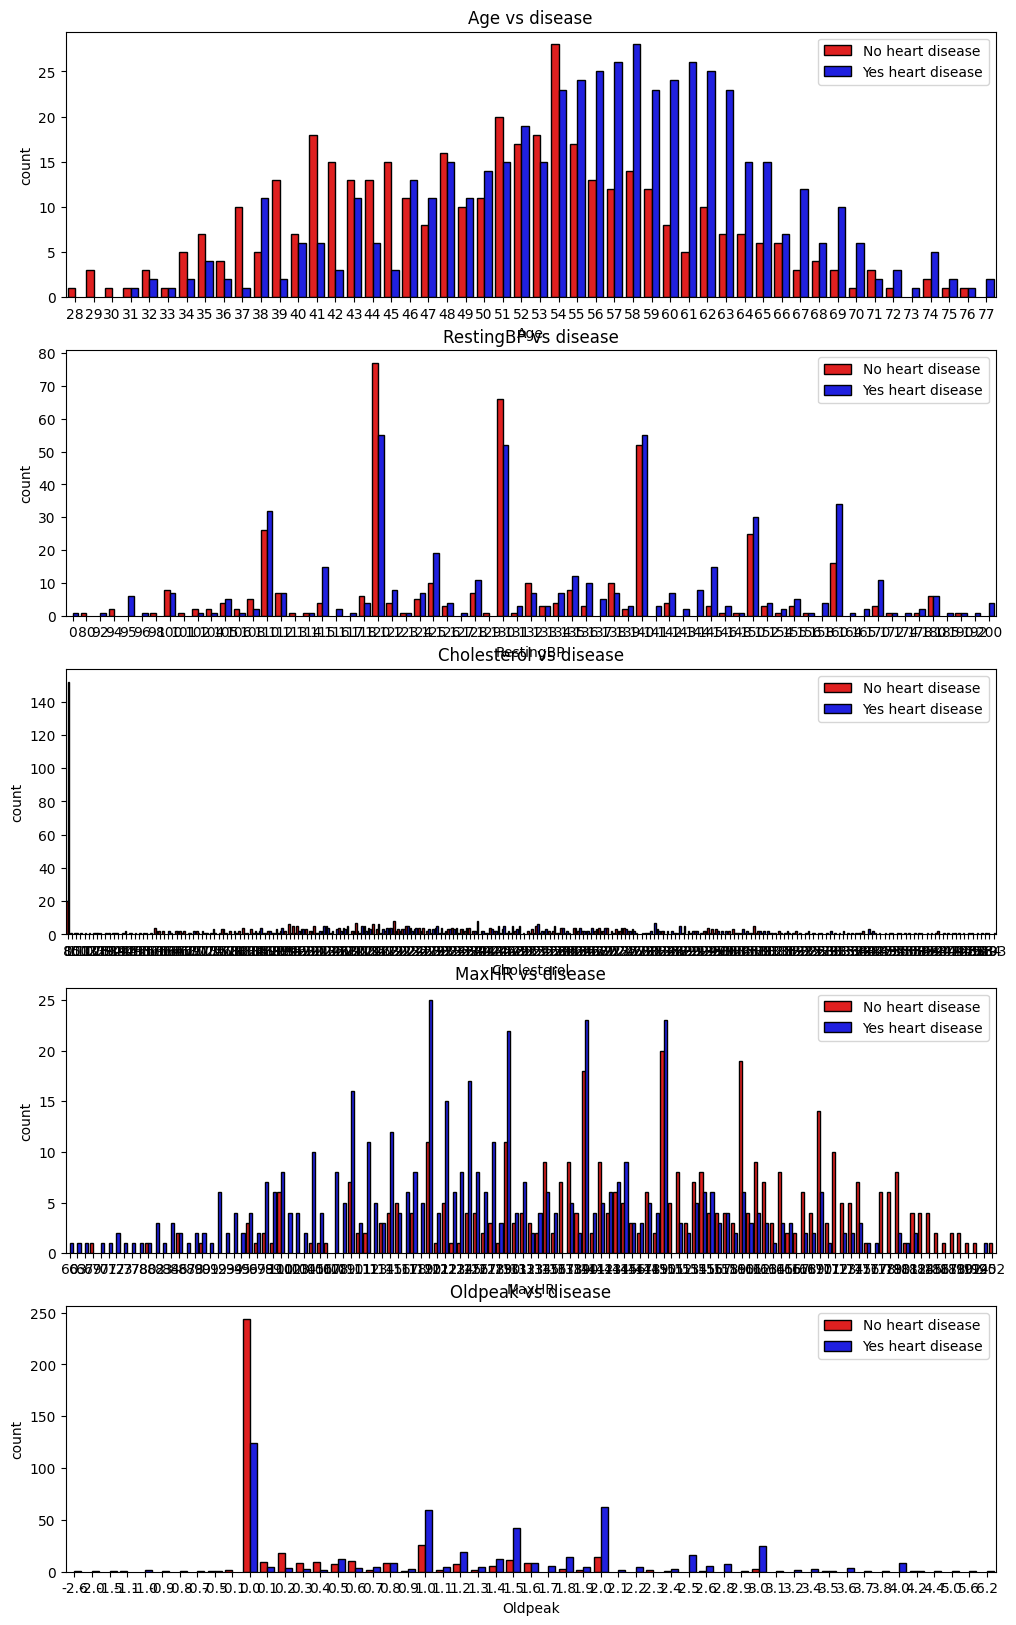

In [40]:
# now lets see for the numerical features vs the heart disease

fig,ax=plt.subplots(nrows=5,ncols=1,figsize=(12,20))
for i in range(len(num)):
    
    sns.countplot(
        x=num[i],
        data=df1,
        hue='HeartDisease',
        palette=['red','blue'],
        edgecolor='black',
        ax=ax[i]
    )

    title = f"{num[i]} vs disease"
    ax[i].set_title(title)
    
    # Add a legend for the current subplot
    ax[i].legend(['No heart disease', 'Yes heart disease'])

plt.show()

In [41]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [42]:
df1['RestingBP'].max()

200

In [43]:
df1['Cholesterol'].max()

603

In [44]:
# as from the above graphs u can see that it is very hard to visualize these graphs as the graphs are too much complex 
# therefore we are going to convert these numerical features into categorical features just for the visualization purposes
num

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [45]:
df['RestingBP']=[int(i/5) for i in df['RestingBP']]
df['Cholesterol']=[int(i/10) for i in df['Cholesterol']]
df['MaxHR']=[int(i/5) for i in df['MaxHR']]
df['Oldpeak']=[int((i*10)/5) for i in df['Oldpeak']]

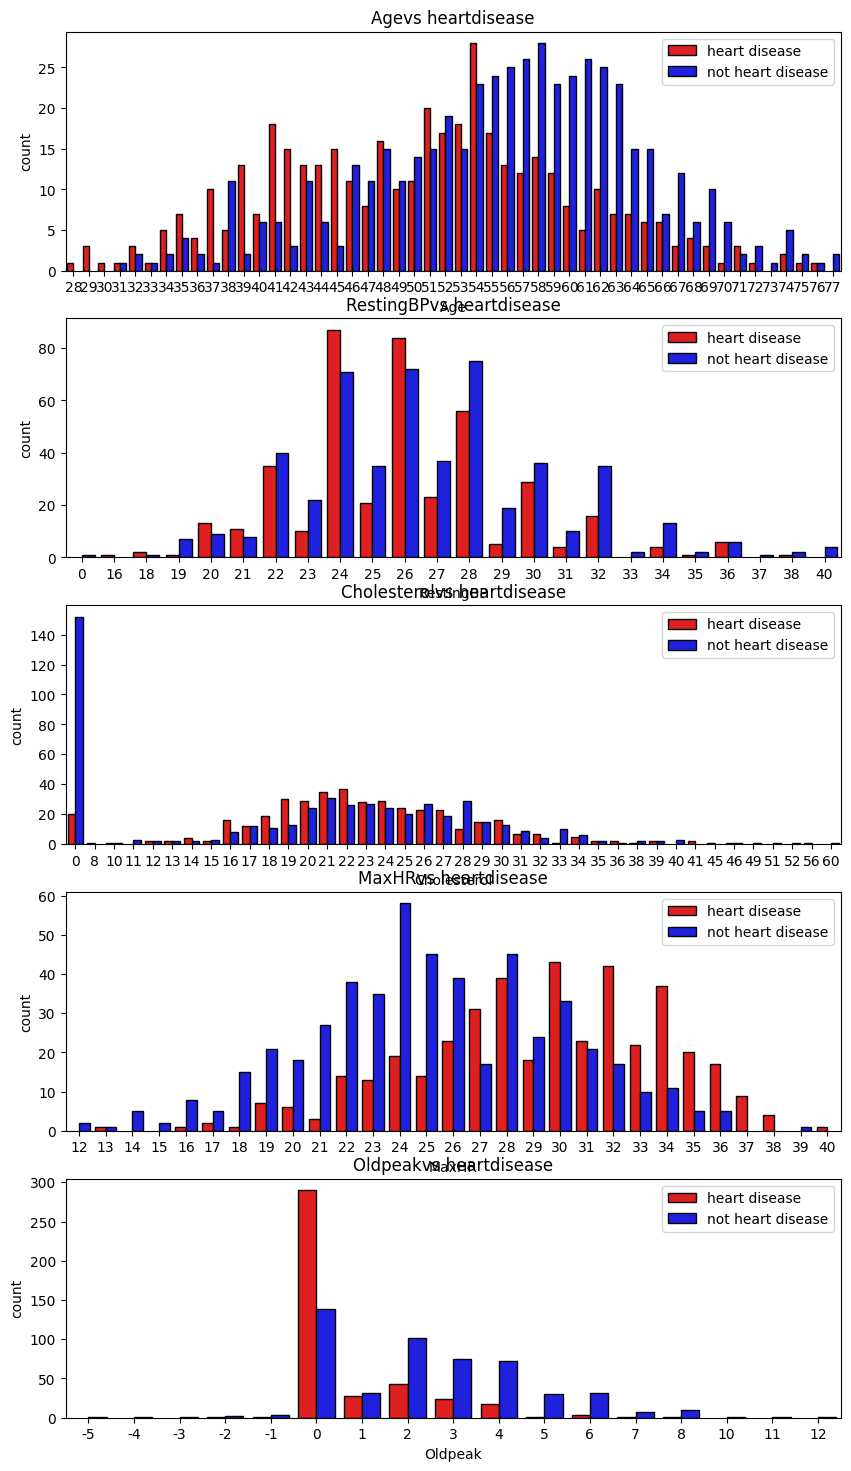

In [46]:
fig , ax = plt.subplots(nrows=5,ncols=1,figsize=(10,18))
for i in range(len(num)):
    sns.countplot(
        x=num[i],
        data=df,
        palette=['red','blue'],
        ax=ax[i],
        hue='HeartDisease',
        edgecolor='black'
    )

    title=num[i] + 'vs heartdisease'
    ax[i].legend(['heart disease','not heart disease'])
    ax[i].set_title(title)

plt.show()

In [47]:
''' 
From the RestingBP group data, 95 (19x5) - 170 (34x5) readings are most prone to be detected with heart diseases.
Cholesterol levels between 160 (16x10) - 340 (34x10) are highly susceptible to heart diseases.
For the MaxHR readings, heart diseases are found throughout the data but 70 (14x5) - 180 (36x5) values has detected many cases.
Oldpeak values also display heart diseases throughout. 0 (0x5/10) - 4 (8x5/10) slope values display high probability to be diagnosed with heart diseases.
'''
# inference that we can draw from the above graphs

' \nFrom the RestingBP group data, 95 (19x5) - 170 (34x5) readings are most prone to be detected with heart diseases.\nCholesterol levels between 160 (16x10) - 340 (34x10) are highly susceptible to heart diseases.\nFor the MaxHR readings, heart diseases are found throughout the data but 70 (14x5) - 180 (36x5) values has detected many cases.\nOldpeak values also display heart diseases throughout. 0 (0x5/10) - 4 (8x5/10) slope values display high probability to be diagnosed with heart diseases.\n'

In [48]:
df['Sex']

0      M
1      F
2      M
3      F
4      M
      ..
913    M
914    M
915    M
916    F
917    M
Name: Sex, Length: 918, dtype: object

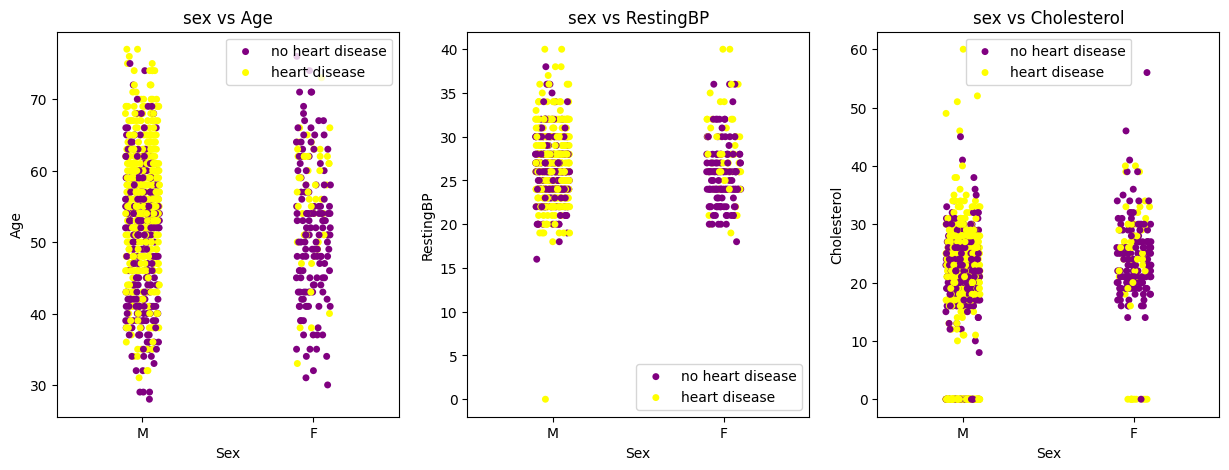

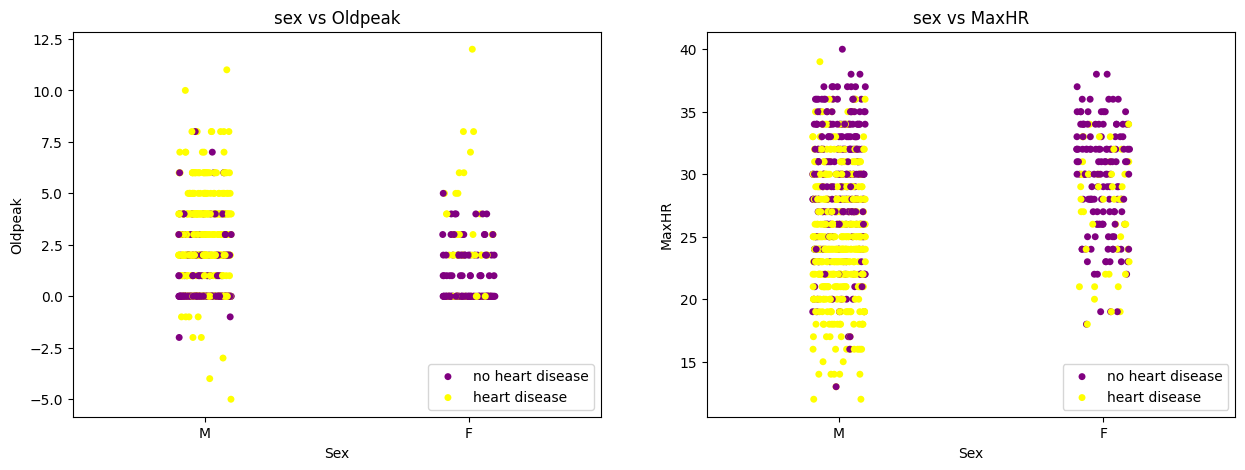

In [49]:
# so form here we will be doing the categorical vs the numerical features

fig ,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
for i in range(3):
    cur_ax=plt.subplot(1,3,i+1)
    sns.stripplot(
        data=df,
        x='Sex',
        y=num[i],
        ax=cur_ax,
        hue='HeartDisease',
        palette=['purple','yellow']
    )
    title= 'sex vs ' + num[i]
    cur_ax.set_title(title)
    cur_ax.legend(['no heart disease' , 'heart disease'])

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
for i in [-1,-2]:
    cur_ax=plt.subplot(1,2,-i)
    sns.stripplot(
        data=df,
        x='Sex',
        y=num[i],
        hue='HeartDisease',
        palette=['purple','yellow'],
        ax=cur_ax
    )
    cur_ax.legend(['no heart disease' , 'heart disease'])
    title='sex vs ' + num[i]
    cur_ax.set_title(title)

plt.show()

In [50]:
# toh beta aise hi saare kr lena khud se mtlb every categorical vs every other numerical feature

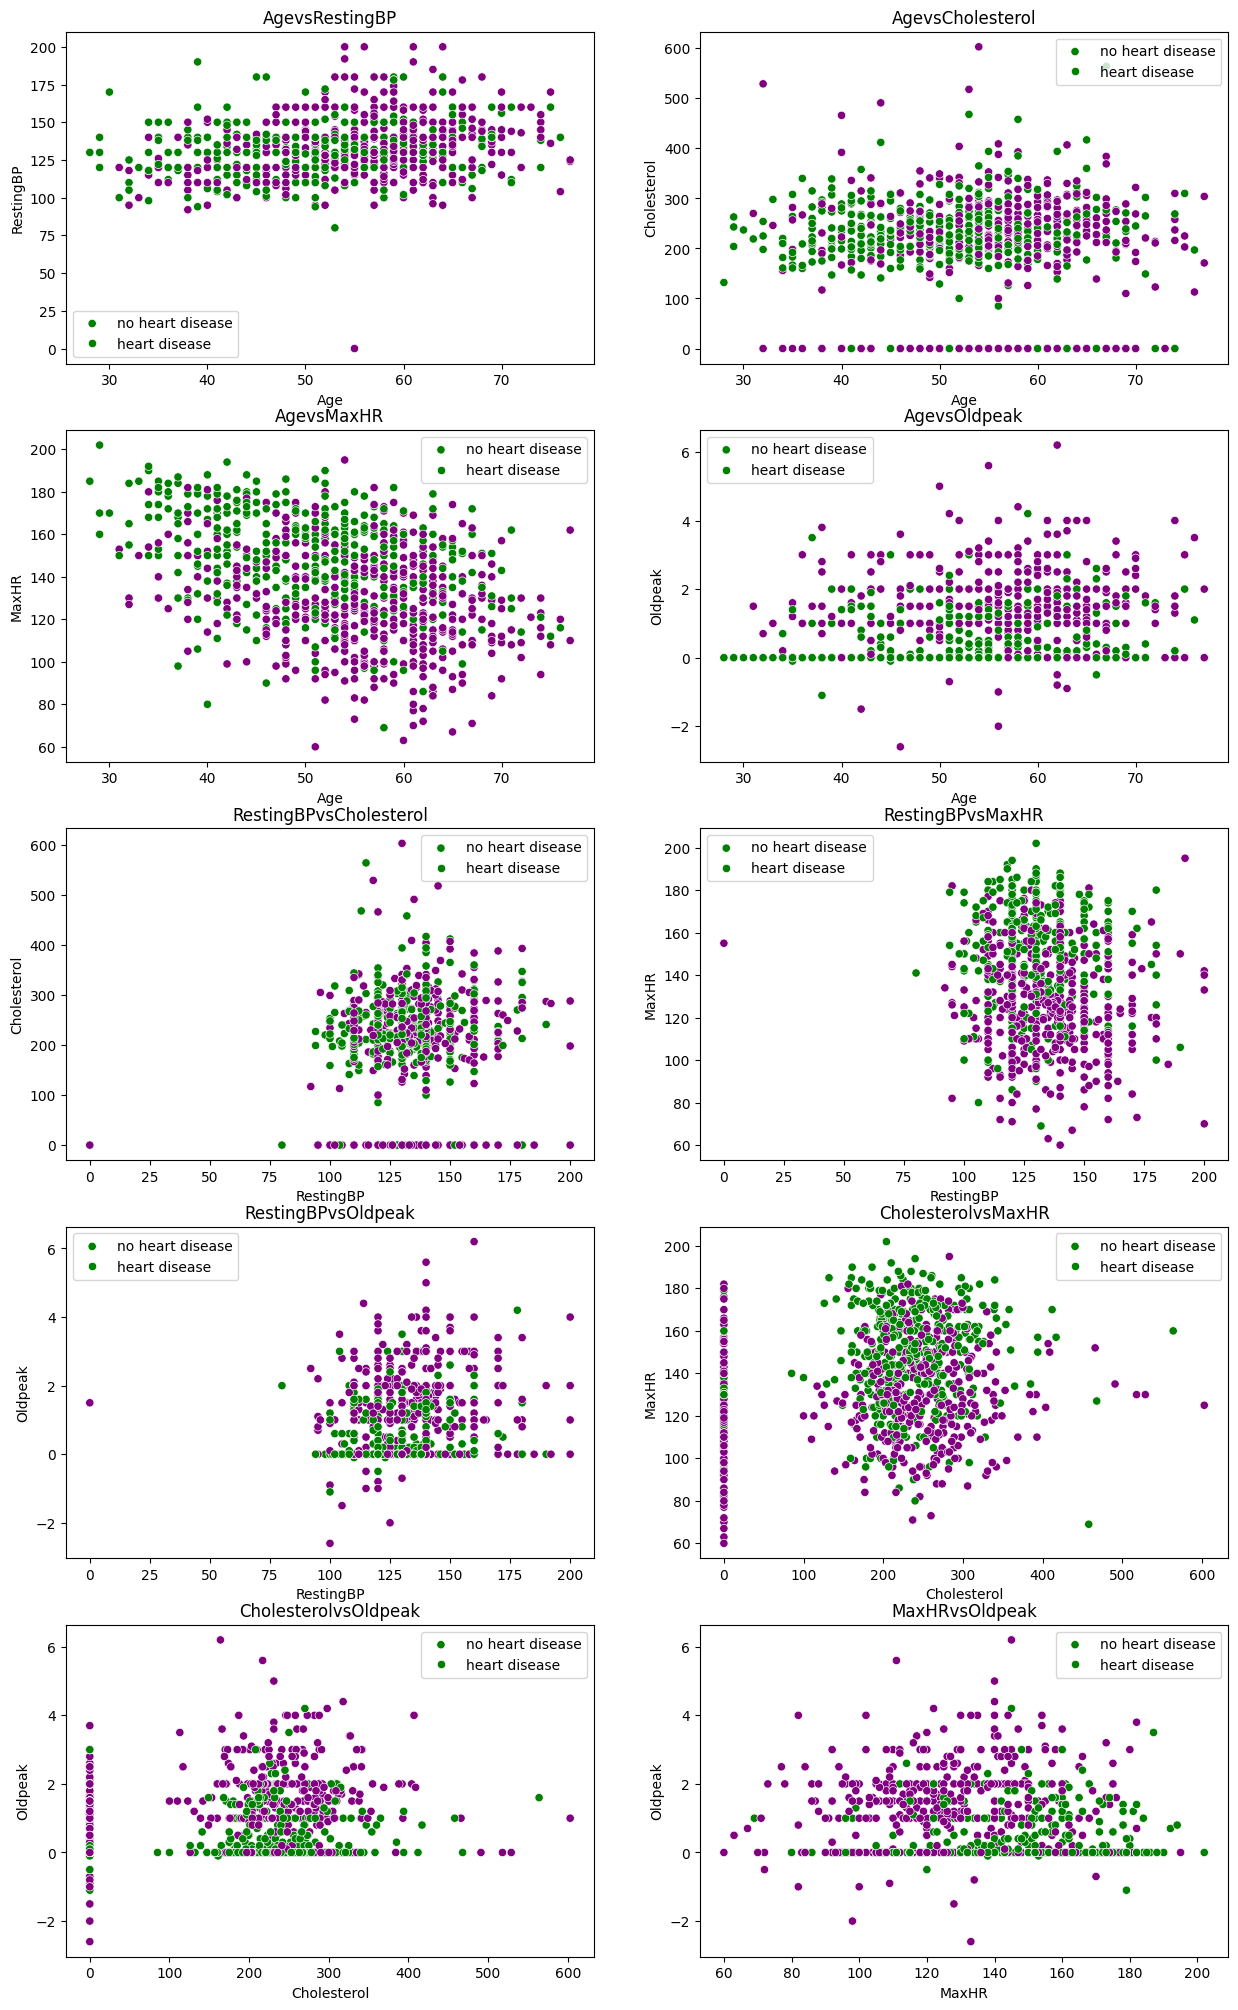

In [51]:
# so here we will be doing numerical vs numerical features
# since there are total of 5 features in the num list so we will be having 5C2 sublots

fig,ax=plt.subplots(nrows=5,ncols=2,figsize=(15,25))
a=0 # for counting of the subplot number
for i in range(len(num)):
    for j in range(len(num)):
        if i != j and j>i :
            a=a+1
            cur_ax=plt.subplot(5,2,a)
            sns.scatterplot(
                data=df1,
                x=num[i],
                y=num[j],
                hue='HeartDisease',
                palette=['green' , 'purple'],
                ax=cur_ax
            )
            title=num[i] + "vs" + num[j]
            cur_ax.set_title(title)
            cur_ax.legend(['no heart disease','heart disease'])

plt.show()



In [52]:
''' 
Categorical Features (Order) :

Sex : Male > Female
ChestPainType : ASY > NAP > ATA > TA
FastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
RestingECG : Normal > ST > LVH
ExerciseAngina : Angina > No Angina
ST_Slope : Flat > Up > Down
Numerical Features (Range) :

Age : 50+
RestingBP : 95 - 170
Cholesterol : 160 - 340
MaxHR : 70 - 180
Oldpeak : 0 - 4
Now that we have understood the typical values of the features, we move on to the next step where we select the appropriate features for modeling!

'''

# so these are the inference that we get from our eda

' \nCategorical Features (Order) :\n\nSex : Male > Female\nChestPainType : ASY > NAP > ATA > TA\nFastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)\nRestingECG : Normal > ST > LVH\nExerciseAngina : Angina > No Angina\nST_Slope : Flat > Up > Down\nNumerical Features (Range) :\n\nAge : 50+\nRestingBP : 95 - 170\nCholesterol : 160 - 340\nMaxHR : 70 - 180\nOldpeak : 0 - 4\nNow that we have understood the typical values of the features, we move on to the next step where we select the appropriate features for modeling!\n\n'

from here we will be doing the feature scaling

In [53]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [54]:
# so as we all know that the scaling is done basically done on the numerical features
# so as in the explanation we are standardizing all the other features except the oldpeak and given the reason that the oldpeak is not nrmlly distributed
# and according to the explanation we apply standard on the features that are nrmlly distri
# but when u have some time do some experiments and then believe in it

ss=StandardScaler()
mms=MinMaxScaler()

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,0.295455,2,0
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.409091,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,0.295455,2,0
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.465909,1,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,0.295455,2,0


<Axes: >

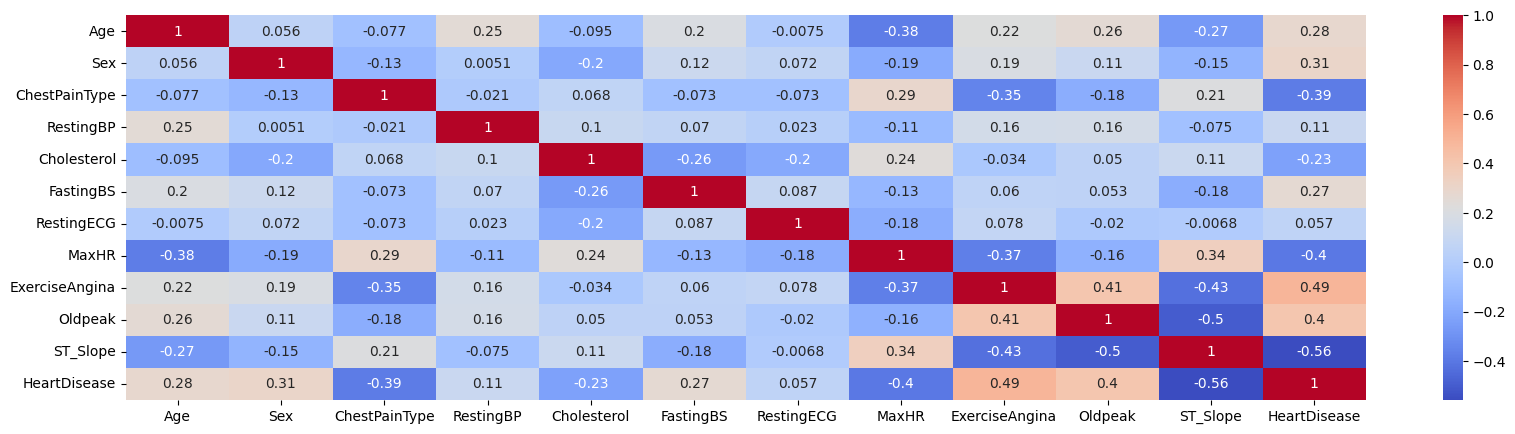

In [55]:
plt.figure(figsize=(20,5))
sns.heatmap(df1.corr(),cmap='coolwarm',annot=True)

Text(0.5, 1.0, 'Correlation w.r.t HeartDisease')

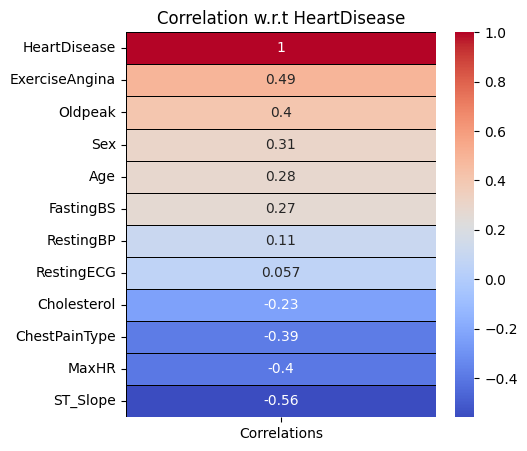

In [56]:
# It is a huge matrix with too many features. We will check the correlation only with respect to HeartDisease.
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black')
plt.title('Correlation w.r.t HeartDisease')

In [57]:
# so now we are going to do the selection of important features using certain techs
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [58]:
feat=df1.loc[:,cate[:-1]] # selecting all the categorical features except the last one
tar=df1.loc[:,cate[-1]] # selecting the target variable

Text(0.5, 1.0, 'relations')

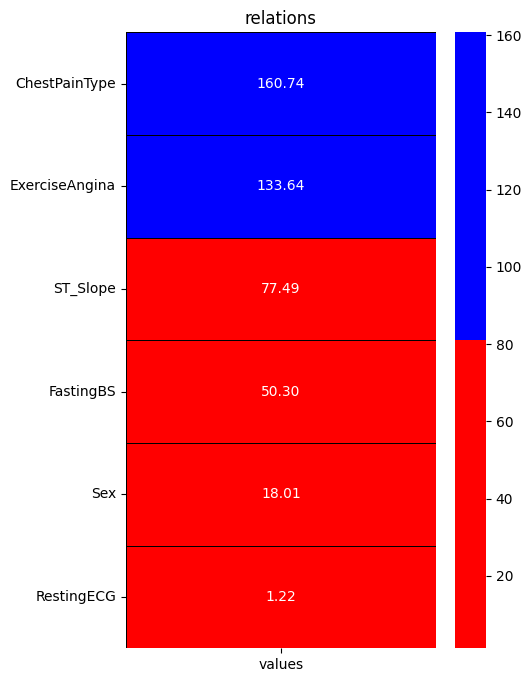

In [59]:
best_features=SelectKBest(score_func=chi2,k='all') # here the k suggests that how many top features that we want to select in order to have the top k best features for the future predictions
fit=best_features.fit(feat,tar)
feat_scores=pd.DataFrame(data=fit.scores_,index=list(feat.columns),columns=['values'])
plt.subplots(figsize=(5,8))
sns.heatmap(feat_scores.sort_values(ascending=False,by='values'),annot=True,fmt='.2f',cmap=['red','blue'],linecolor='black',linewidths=0.4)
plt.title('relations')
# Different scoring functions are used in feature selection because different types of data and relationships require different statistical methods to evaluate their relevance and significance.

In [60]:
#except the restingecg all the other features are important for calculating the heart disease

Text(0.5, 1.0, 'num vs tar')

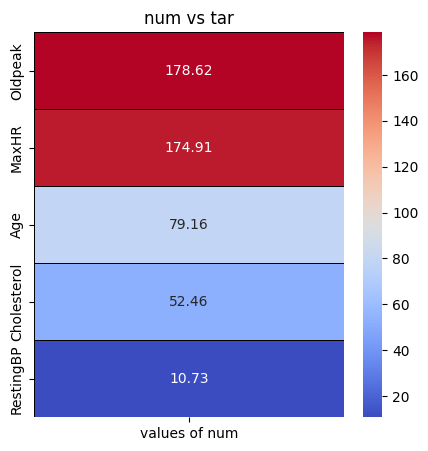

In [61]:
from sklearn.feature_selection import f_classif

feat=df1.loc[:,num]
tar=df1.loc[:,cate[-1]]

sel=SelectKBest(score_func=f_classif,k='all')
sel.fit(feat,tar)

scores=pd.DataFrame(data=sel.scores_,index=num,columns=['values of num'])

plt.subplots(figsize=(5,5))
sns.heatmap(data=scores.sort_values(ascending=False,by='values of num'),annot=True,cmap='coolwarm',fmt='.2f',linecolor='black',linewidths=0.4)
plt.title('num vs tar')

In [62]:
# we can see restingbp has very less impact on the target variable therefore we can assume that we can remove this and not nuch effect will be laid

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold #this cross-validation is helpful when we do not need the stratification basically in regression tasks.
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score,precision_score,recall_score
#from sklearn.metrics import plot_roc_curve

In [65]:
features=df1.drop(columns=['HeartDisease','RestingBP','RestingECG']).values
target=df1['HeartDisease'].values


In [66]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.20,random_state=2)

In [ ]:
x_train.shape

(734, 9)

In [ ]:
x_test.shape

(184, 9)

In [ ]:
type(x_train)

numpy.ndarray

In [106]:
def model(classifier):
    classifier.fit(x_train,y_train)
    cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=3) # this cross validation tech is used to make sure that the splits also have the sme proportion of the target variable as in the original dataset so that the predictions are according to the ratio of the original dataset
    predictions=classifier.predict(x_test)
    acc_score_on_test=accuracy_score(y_true=y_test,y_pred=predictions)
    print('the accurary of the model on test data is','{0:.2%}'.format(acc_score_on_test))
    cv_score_on_train=cross_val_score(estimator=classifier,X=x_train,y=y_train,scoring='roc_auc',cv=cv).mean()
    print('the cross validation score is','{0:.2%}'.format(cv_score_on_train))
    #now since the roc_auc_score needs the probabilities of the positive side we will have to calculate it first \
    pred=classifier.predict_proba(x_test)[0:, 1]
    roc_score_on_test=roc_auc_score(y_true=y_test,y_score=pred)
    print('the roc auc score on the test data is ','{0:.2%}'.format(roc_score_on_test))

    f1=f1_score(y_true=y_test,y_pred=predictions)
    print('the f1 score of the test data is','{0:.2%}'.format(f1))

    #the same format goes for the precision and recall as well so there shouldnt be any confusion while coding them both
    #plot_roc_curve(classifier,x_test,y_test)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
classi=LogisticRegression(penalty='l2',C=10,random_state=3)

In [107]:
model(classi)

the accurary of the model on test data is 80.98%
the cross validation score is 90.33%
the roc auc score on the test data is  88.74%
the f1 score of the test data is 81.68%


In [87]:
from sklearn.svm import SVC

In [90]:
classi=SVC(kernel='linear',random_state=3,C=0.1,probability=True)

In [91]:
model(classi)

the accurary of the model on test data is 87.50%
the cross validation score is 90.43%
the roc auc score on the test data is  91.01%


In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
classi=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=1)

In [94]:
model(classi)

the accurary of the model on test data is 84.78%
the cross validation score is 89.15%
the roc auc score on the test data is  89.96%


In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
classi=RandomForestClassifier(n_estimators=100,max_depth=6,criterion='gini')

In [97]:
model(classi)

the accurary of the model on test data is 84.78%
the cross validation score is 92.97%
the roc auc score on the test data is  92.86%


In [98]:
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
classi=GradientBoostingClassifier(loss='log_loss',n_estimators=150,learning_rate=0.7)

In [101]:
model(classi)

the accurary of the model on test data is 80.98%
the cross validation score is 90.28%
the roc auc score on the test data is  88.70%


In [102]:
#  In this case, data scaling was executed before the feature selection test
# We might feel like we are tampering the data before passing it to the tests but the results are same
# so we can learn from this point that do the selection first and then do the scaling as it might hamper the classification task

In [103]:
# For this problem, outlier detection was not done as I was not able to read any papers about heart diseases. 
#It becomes a pivotal part to understand the subject before removing outliers even though the outlier detection tests come out positive.

In [104]:
#For modeling, hyperparameter tuning is not done.
# It can push the performances of the algorithms.
# Overall the algorithm performances are good.

In [110]:
# stratification basically means that we are splitting the data into betweeen the folds in the same proportion as they are in the original dataset
# the splitting is on the basis of the positive class and the negative class
# toh original data mein jis proportion se wo log batte huye honge usi sense mein stratified wala bhi kr deta hai

For example, if you have a binary classification problem with 80% of samples belonging to class A and 20% belonging to class B, you'd want each fold to maintain this 80-20 ratio of classes. Stratified cross-validation ensures that each fold has a similar class distribution to the original dataset.

This is for the understanding of the stratification of the data

def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

    ye bhi padh lena jaruri hai help hi krega aur better bnane mein tumko.

-------------------------------------------END-----------------------------------------------------